In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def f(xk):
    x,y = xk[:, 0]
    return x ** 2 + x * y + 10 * y ** 2 - 22 * y - 5 * x

def stepf(a, xk, dk):
    return (xk + a * dk)[0]


def grad(xk):
    x,y = xk
    return np.array([[2 * x + y - 5], [x + 20 * y - 22]])

In [20]:
from scipy.optimize import minimize
from functools import partial

In [ ]:
def backtrack(
    f,
    df,
    x,
    p,
    df_x=None,
    f_x=None,
    args=(),
    alpha=0.0001,
    beta=0.9,
    eps=_epsilon,
    Verbose=False,
):
    """
    Backtracking linesearch
    f: function
    x: current point
    p: direction of search
    df_x: gradient at x
    f_x = f(x) (Optional)
    args: optional arguments to f (optional)
    alpha, beta: backtracking parameters
    eps: (Optional) quit if norm of step produced is less than this
    """

    if f_x is None:
        f_x = f(x, *args)
    if df_x is None:
        df_x = df(x, *args)

    assert df_x.T.shape == p.shape
    assert 0 < alpha < 1, "Invalid value of alpha in backtracking linesearch"
    assert 0 < beta < 1, "Invalid value of beta in backtracking linesearch"

    derphi = np.dot(df_x, p)

    assert derphi.shape == (1, 1) or derphi.shape == ()
    assert derphi < 0, "Attempted to linesearch uphill"

    stp = 1.0
    fc = 0
    len_p = norm(p)

    # Loop until Armijo condition is satisfied
    while f(x + stp * p, *args) > f_x + alpha * stp * derphi:
        stp *= beta
        fc += 1
        if Verbose:
            print "linesearch iteration", fc, ":", stp, f(
                x + stp * p, *args
            ), f_x + alpha * stp * derphi
        if stp * len_p < eps:
            print "Step is  too small, stop"
            break
    # if Verbose: print 'linesearch iteration 0 :', stp, f_x, f_x

    if Verbose:
        print "linesearch done"
    # print fc, 'iterations in linesearch'
    return stp

ValueError: `f0` passed has more than 1 dimension.

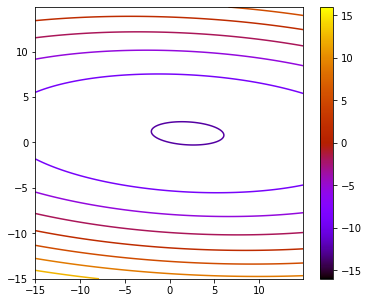

In [21]:
# Visualize contour plot of given surface
xy_lim = 15
x_axis = np.arange(-xy_lim, xy_lim, 0.1)
y_axis = np.arange(-xy_lim, xy_lim, 0.1)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
surface = f(np.array([[x_mesh], [y_mesh]]))

# Setup colorbar
mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
mappable.set_array(surface)
mappable.set_clim(np.min(surface), -np.min(surface))

# Make plot
fig = plt.figure(figsize=(6, 5))
plt.contour(x_mesh, y_mesh, surface, cmap="gnuplot")
fig.colorbar(mappable)

xk = np.array([[0], [10]])
a = 0.1
for k in range(50):
    dk = -grad(x)
    a = minimize(partial(stepf, xk=xk, dk=dk), [0.1]) 
    x = x + a * dk 
    
    error = np.linalg.norm(dk, ord=2)